# Background and Objective

As the banking industry faces increasing competition and higher customer expectations, accurately predicting customer churn has become a critical factor for banks in their efforts to retain customers and enhance overall customer satisfaction. Understanding the underlying factors that contribute to customer churn can provide valuable insights that help banks develop targeted retention strategies, optimize the customer experience, and improve overall customer relationship management practices. By leveraging advanced analytics and data-driven approaches, banks can gain a deeper understanding of customer behavior and preferences, enabling them to address customer churn more effectively.

The primary objective of this project is to develop a robust churn prediction model that can accurately identify potential churners among bank customers. Through the analysis of various customer-related data such as transaction history, demographics, account activity, and customer interactions, the model aims to predict which customers are most likely to churn in the near future. By utilizing sophisticated machine learning algorithms and predictive analytics techniques, the model can identify patterns and indicators that are indicative of potential churn, allowing banks to take proactive measures to retain these customers and minimize customer attrition. Ultimately, the development of an accurate churn prediction model can significantly contribute to the reduction of customer churn rates and improve overall customer retention for banks.

Dataset:<br>
Bank Customer Churn
<br>(https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)
<br>18 columns</br>10.000 rows</br>

- **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
- **CustomerId**: Contains random values and has no effect on customer leaving the bank.
- **Surname**: The surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography**: A customer’s location can affect their decision to leave the bank.
- **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**: Active customers are less likely to leave the bank.
- **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**: Whether or not the customer left the bank.
- **Complain**: Customer has complaint or not.
- **Satisfaction Score**: Score provided by the customer for their complaint resolution.
- **Card Type**: Type of card hold by the customer.
- **Points Earned**: the points earned by the customer for using credit card.



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# splitting data and model evaluation
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
# read data
df = pd.read_csv('Customer-Churn-Records.csv', encoding='utf-8')

# print shape of data
print('Number of instances : ', df.shape[0])
print('Number of features : ', df.shape[1])

df.head(5)

Number of instances :  10000
Number of features :  18


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# show data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
# show shape of data
df.shape

(10000, 18)

In [5]:
# initialize category and numeric data
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']

In [6]:
# show statistical summary of numeric data
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
# show statistical summary of category data
df[category].describe().T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


# Data Preparation

## Preprocessing

### Duplicate Value

In [8]:
# show duplicated data
df.duplicated().sum()

0

In [9]:
# show duplicated data in 'Surname'
df.duplicated('Surname').sum()

7068

### Missing Value

In [10]:
# show missing values of data
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Feature Engineering

In [11]:
# create a new column 'Age Group' based on the 'Age' column
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


### Drop Columns

In [12]:
# drop columns
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Age Group'],
      dtype='object')

### Encoding

In [13]:
# identify categorical columns in the DataFrame
category = [i for i in df.columns if df[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(df[col].value_counts())
    print()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64



In [14]:
# show category columns
df[category].columns

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# define a function to encode category data into numeric
def encode_data(data, columns, method):
    
    # one-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)   
        
    # ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)
      
    # frequency encoding
    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)
        
        # for column in columns:
        #     frequency_encoding = data[column].value_counts(normalize=True).to_dict()
        #     data[column] = data[column].replace(frequency_encoding)
    
    return data

In [16]:
ordinal_columns = ['Geography', 'Gender', 'Card Type', 'Age Group']

train = df.copy()

# apply the 'encode_data' function to 'ordinal_columns'
train = encode_data(train, ordinal_columns, method='ordinal')

train

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,0
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1


In [17]:
# show shape of df
df.shape

(10000, 17)

In [18]:
# show shape of train
train.shape

(10000, 17)

# Exploratory Data Analysis

## Univariate Analysis

In [19]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):
    
    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
    plt.show()

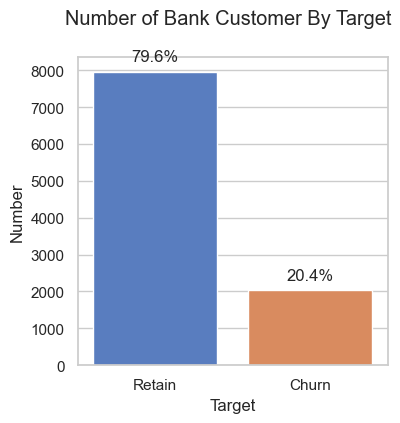

In [20]:
sns.set_theme(style="whitegrid")

chart = 'Number of Bank Customer By Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot based on the target variable
g = sns.countplot(x='Exited', data=df, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# # customize xticks
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

# annotate the percentage on the chart
total = len(df['Exited'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

The graph above shows the distribution of the target variable, it is known that the number of Churn bank customer is 20.4%. It is concluded that there is an imbalance in the data on the target variable.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

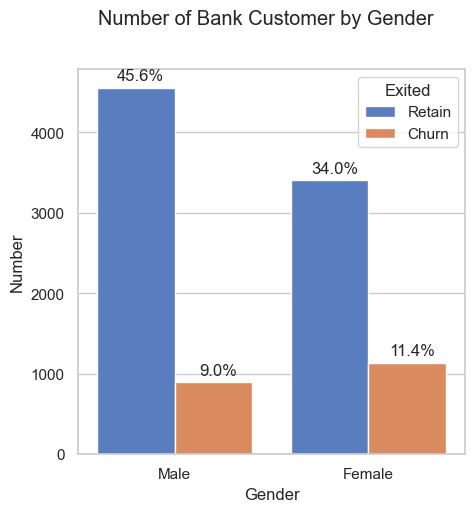

In [21]:
# initialize chart title
chart = 'Number of Bank Customer by Gender'

# apply the procedure to plot the chart
countplot_univariate(df, 'Gender', 'Exited', 'Gender', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of the target variable by 'Gender'. Female bank customers churn the most with a percentage of 11.4% compared to males who have a percentage of 9%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

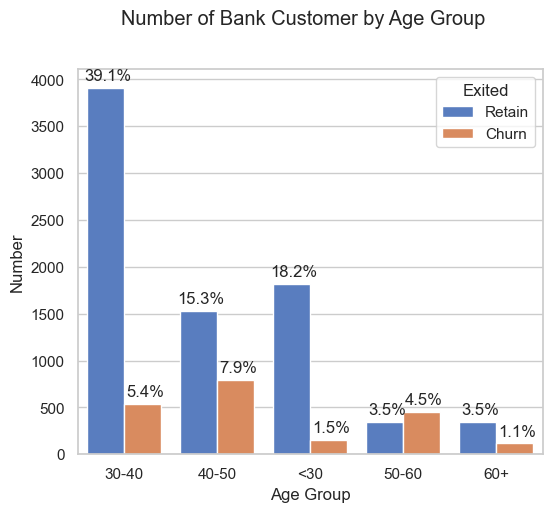

In [22]:
# initialize chart title
chart = 'Number of Bank Customer by Age Group'

# apply the procedure to plot the chart
countplot_univariate(df, 'Age Group', 'Exited', 'Age Group', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables by 'Age Group'. Bank customers in the 40-50 age group have a higher churn percentage than other age groups at 7.9%. This is followed by the 30-40 age group with a churn percentage of 5.4%, the 50-60 age group with a percentage of 4.5%, the less than 30 age group with a percentage of 1.5%, and the more than 60 age group with a percentage of 1.1%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

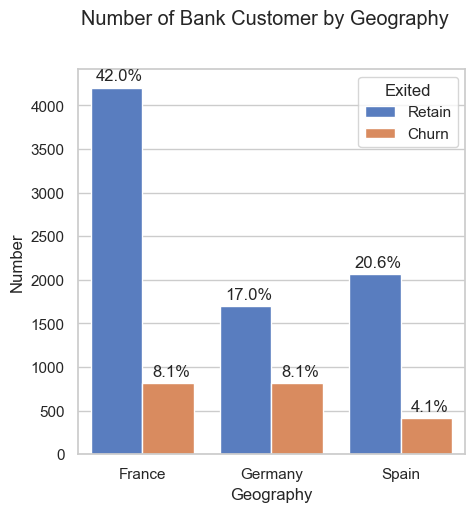

In [23]:
# initialize chart title
chart = 'Number of Bank Customer by Geography'

# apply the procedure to plot the chart
countplot_univariate(df, 'Geography', 'Exited', 'Geography', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables by 'Geography'. France and Germany have a churn percentage of 8.1% each and Spain with a churn percentage of 4.1%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

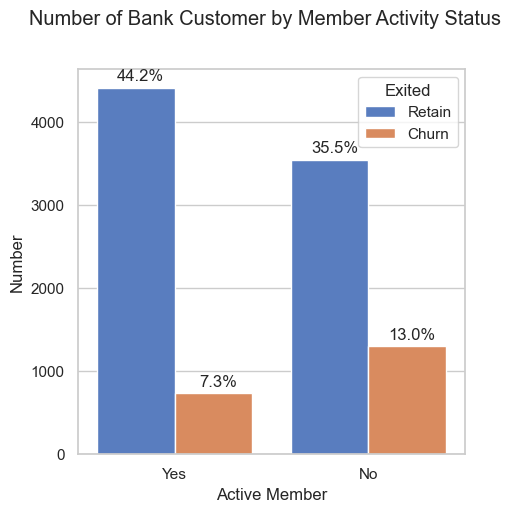

In [24]:
# initialize chart title
chart = 'Number of Bank Customer by Member Activity Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'IsActiveMember', 'Exited', 'Active Member', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of the target variable by 'IsActiveMember'. Bank customers who are not active members have a higher churn percentage than active customers, with a churn percentage of 13%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

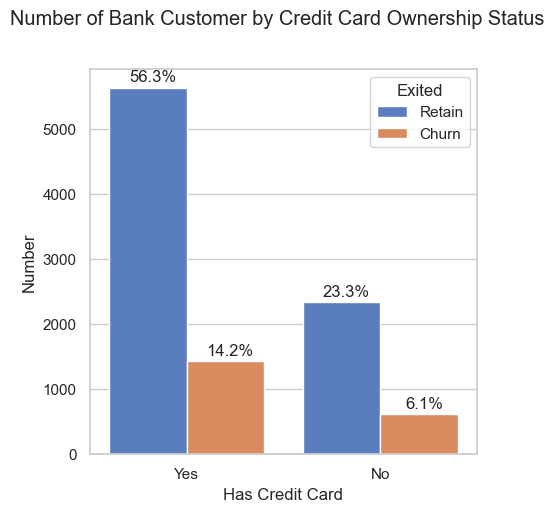

In [25]:
# initialize chart title
chart = 'Number of Bank Customer by Credit Card Ownership Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'HasCrCard', 'Exited', 'Has Credit Card', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables based on 'HasCrCard'. Bank customers who have a credit card churn the most with a percentage of 14.2% compared to customers who do not have a credit card with a churn percentage of 6.1%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

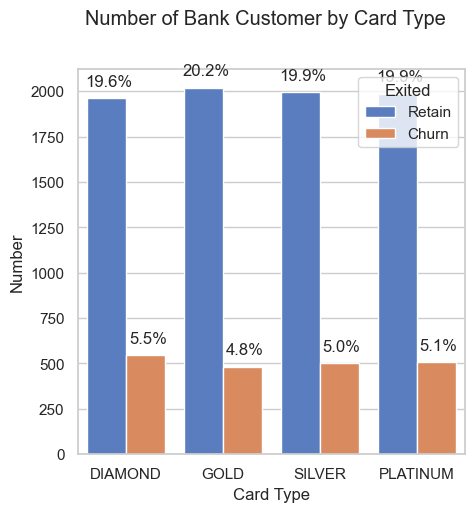

In [26]:
# initialize chart title
chart = 'Number of Bank Customer by Card Type'

# apply the procedure to plot the chart
countplot_univariate(df, 'Card Type', 'Exited', 'Card Type', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables based on 'HasCrCard'. Bank customers with Diamond card type churn more with a percentage of 5.5% than others.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

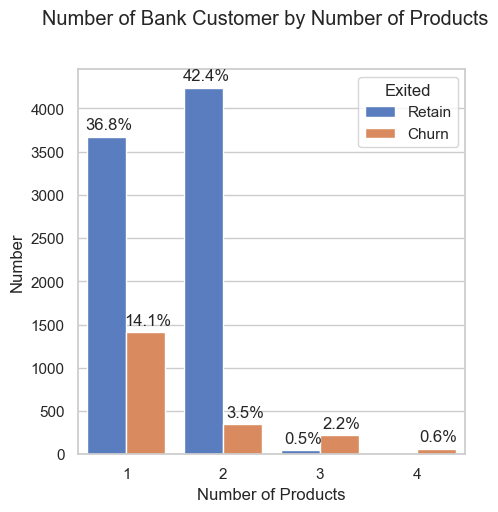

In [27]:
# initialize chart title
chart = 'Number of Bank Customer by Number of Products'

# apply the procedure to plot the chart
countplot_univariate(df, 'NumOfProducts', 'Exited', 'Number of Products', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of target variables by 'HasCrCard'. Bank customers who purchased at least 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

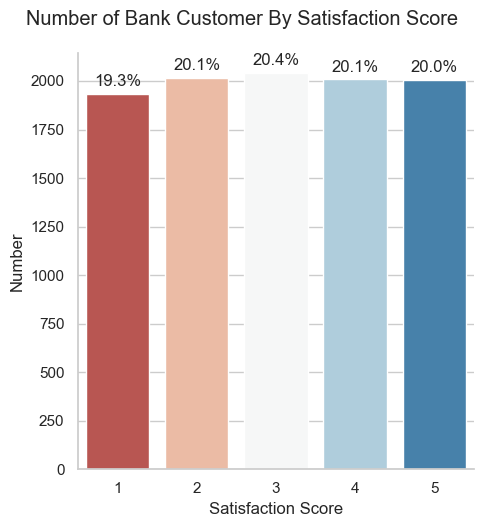

In [28]:
chart = 'Number of Bank Customer By Satisfaction Score'

g = sns.catplot(x='Satisfaction Score', data=df, kind='count', height=5, palette='RdBu')
g.set(ylabel='Number', xlabel='Satisfaction Score')
g.fig.suptitle(f'{chart}', y=1.05)
            
total = len(df)
for p in g.ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    g.ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height + 25),
                  ha='center', va='bottom', fontsize=12)
            
plt.show()

The graph above shows the distribution of 'Satisfaction Score'. Each satisfaction score has a relatively balanced percentage with the percentage numbers ranging from 19-20%.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

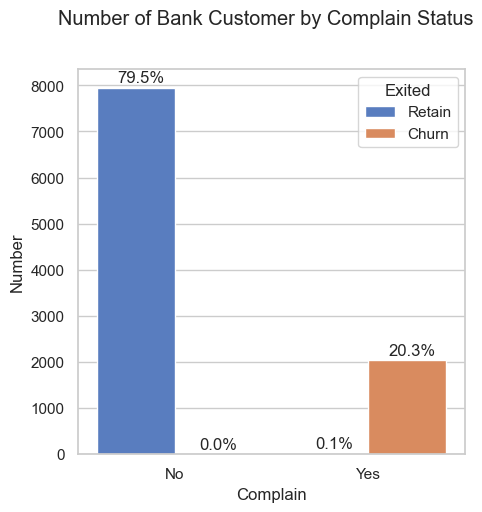

In [29]:
# initialize chart title
chart = 'Number of Bank Customer by Complain Status'

# apply the procedure to plot the chart
countplot_univariate(df, 'Complain', 'Exited', 'Complain', 0, 2, ['No', 'Yes'], 5, 5, 1, \
                     'vertical', chart)

The graph above shows the distribution of 'Complain'. All bank customers who churn are customers who also make complaints against the bank.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

## Bivariate Analysis

In [30]:
sns.set_theme(style="white")

df2 = df.copy()
df2['Churn Status'] = df2['Exited'].map({1: 'Churn', 0: 'Retain'})

In [31]:
# define a procedure to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):
    
    # create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # create a boxplot based on the specified parameter
    sns.boxplot(ax=axes[0], y=y, x=x, showmeans=True, palette='muted', data=data)
    axes[0].set_title(f'Boxplot of {label} by Churn Status', y=1.05)

    # create a histplot based on the specified parameter
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, palette='muted')
    axes[1].set_title(f'Histogram of {label} by Churn Status', y=1.05)

    plt.tight_layout()
    plt.show()

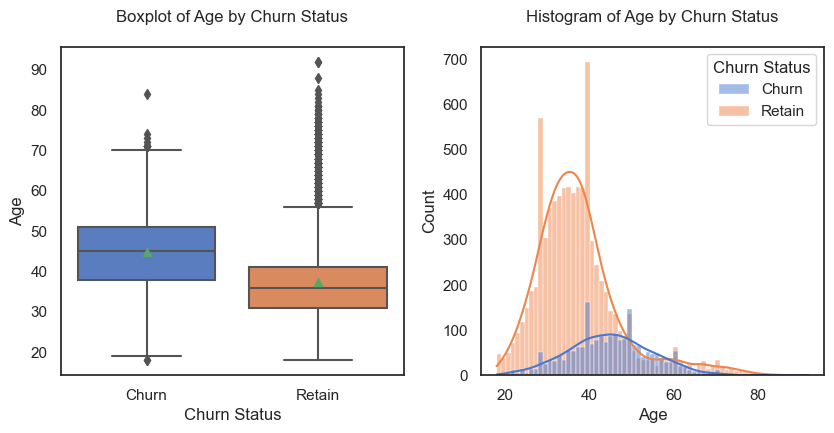

In [32]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'Age', 'Churn Status', 8.5, 4.5, 'Age')

The above graph shows the distribution of 'Age' based on churn status. The age distribution of churned and retained bank customers is relatively similar, spread between the ages of 30 years to 50 years. The age distribution of retained bank customers is mostly between the ages of 30 years and 40 years.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

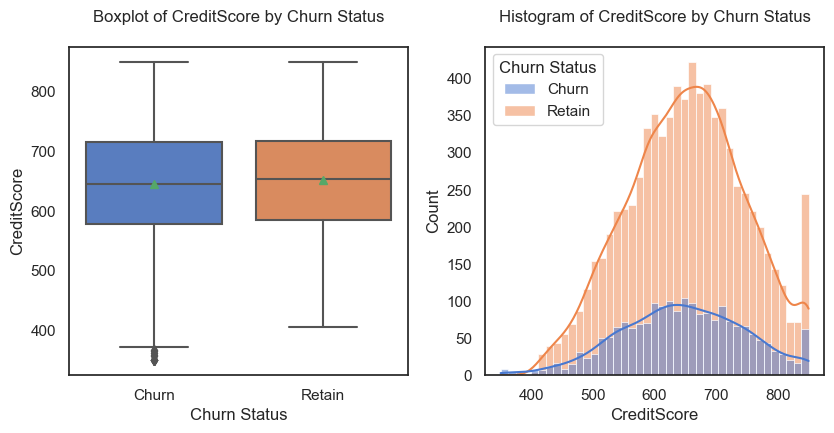

In [33]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'CreditScore', 'Churn Status', 8.5, 4.5, 'CreditScore')

The chart above shows the distribution of 'CreditScore' by churn status. The credit score distribution of churn and retain customers is similar, spread between 600 and 700.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

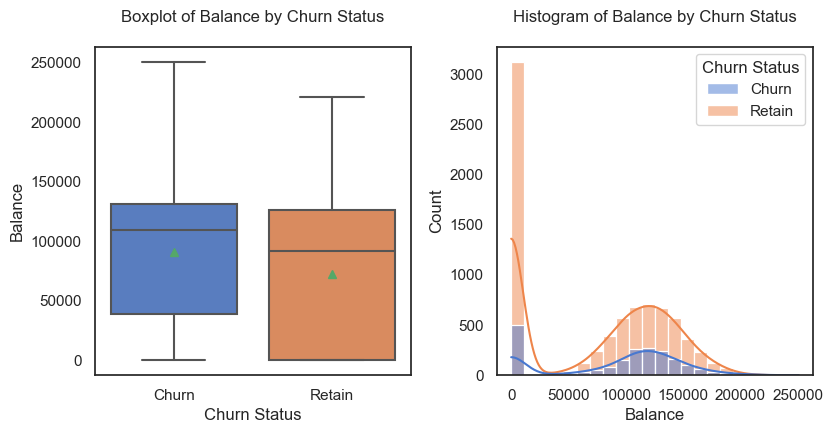

In [34]:
# apply the procedure to plot the chart
distribution_bivariate(df2, 'Churn Status', 'Balance', 'Churn Status', 8.5, 4.5, 'Balance')

The graph above shows the distribution of 'Balance' based on churn status. The balance distribution of churn customers is spread between 40,000 and 125,000. While the balance distribution of retain customers is spread between 0 and 125,000.

**Information**:<br>
**Retain**: Churn refers to the situation where customers or users of a product, service, or subscription discontinue their usage or **cancel** their subscription.<br>
**Churn**: Retain refers to the opposite of churn. It represents the ability of a business to **keep** its existing customers.

## Correlation

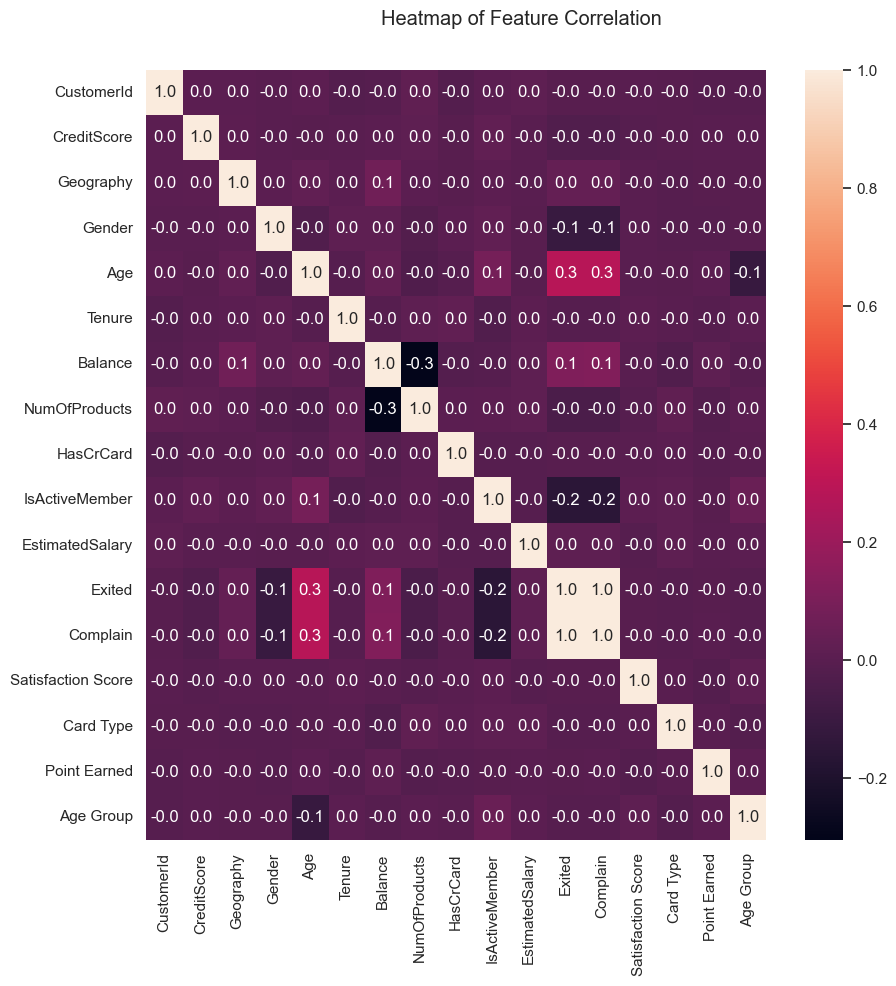

In [35]:
chart = 'Heatmap of Feature Correlation'

plt.figure(figsize=(10, 10))
plt.suptitle(f'{chart}', y=0.94)

# plot a heatmap of feature correlation
sns.heatmap(train.corr(), annot=True, fmt='.1f')
plt.show()

The graph above shows that there are not many features that are strongly correlated linearly with the target. This means that most of the correlations contained in the dataset are non-linear. Based on this, the appropriate model to use is a model that has good performance on datasets that have many non-linear correlations such as Decision Trees, Gradient Boosting, Neural Networks, and Support Vector Machines (SVM).

# Modeling

In [36]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

In [37]:
# show shape of train
train.shape

(10000, 17)

In [38]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1


## Train Test Splitting

In [39]:
sns.set_theme(style="white")

# initialize X as features and y as target
X = train.drop(['Exited'], axis=1).values
y = train['Exited'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

## Sampling

In [40]:
# count the occurrences of target value in
train['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

The number of target classes indicates an imbalanced condition. This needs to be avoided so that the model does not cause bias. To overcome this, it is necessary to do sampling so that the number of target classes approaches a balanced condition.

In [41]:
# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 5573, 1: 1427})
Resample dataset shape: Counter({0: 1427, 1: 1427})


## Naive Bayes

In [42]:
# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.7594108019639935
ROC-AUC Score: 0.6185082473612349
Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.48      0.62      2389
           1       0.27      0.76      0.40       611

    accuracy                           0.54      3000
   macro avg       0.58      0.62      0.51      3000
weighted avg       0.76      0.54      0.58      3000

Confusion Matrix:

 [[1141 1248]
 [ 147  464]]


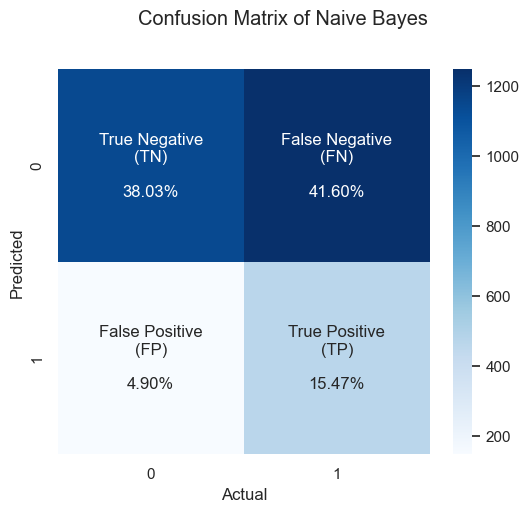

In [43]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: Retain<br>
**Class 1**: Churn

### Cross-validation

In [44]:
# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation recall scores and ROC-AUC scores for the untuned NB classifier
nb_before_tuned_cv_recall_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_before_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.7580473628303206
ROC-AUC  : 0.852979417460044


In [45]:
print(NB_classifier.get_params())

{'priors': None, 'var_smoothing': 1e-09}


### Hyperparameter Tuning

In [46]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_nb_recall = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_nb_recall.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [47]:
best_hyperparams_recall = grid_nb_recall.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall   :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_recall_scores = grid_nb_recall.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_after_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall   :
 {'var_smoothing': 1e-09}
ROC-AUC  :
 {'var_smoothing': 1e-09}

The cross-validation recall and ROC-AUC score for tuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.7580473628303206
ROC-AUC  : 0.852979417460044


In [48]:
best_nb_fit_for_train_data_recall = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_nb_fit_for_train_data_recall)
print("ROC-AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_recall = cross_val_score(best_nb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_nb_fit_for_test_data_recall)
print("ROC-AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Recall   : 0.7580473628303206
ROC-AUC  : 0.852979417460044
Test Data
Recall   : 0.795
ROC-AUC  : 0.7791870410581496


## Decision Tree

In [49]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = DT_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9983633387888707
ROC-AUC Score: 0.9958329879377589
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2389
           1       0.97      1.00      0.99       611

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:

 [[2373   16]
 [   1  610]]


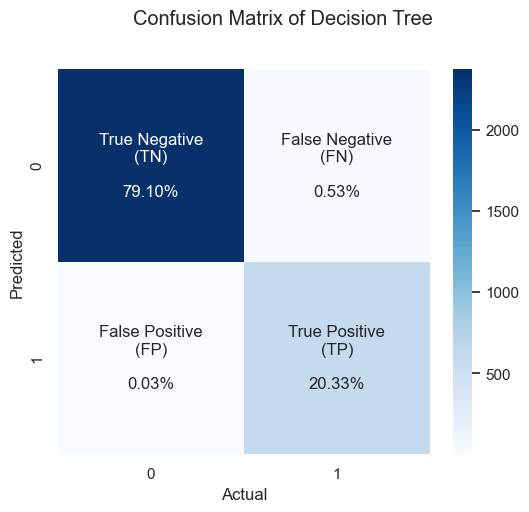

In [50]:
chart = 'Decision Tree'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: Retain<br>
**Class 1**: Churn

### Cross-validation

In [51]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned DT classifier
dt_before_tuned_cv_recall_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
dt_before_tuned_cv_rocauc_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", dt_before_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Decision Tree after a 10 fold cross validation:
Recall   : 0.9971445162308742
ROC-AUC  : 0.9978218100867633


In [52]:
print(DT_classifier.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


### Hyperparameter Tuning

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_dt_recall = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_dt_rocauc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_dt_recall.fit(X_train_resampled, y_train_resampled)
grid_dt_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [54]:
best_hyperparams_recall = grid_dt_recall.best_params_
best_hyperparams_rocauc = grid_dt_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

dt_after_tuned_cv_recall_scores = grid_dt_recall.best_score_
dt_after_tuned_cv_rocauc_scores = grid_dt_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", dt_after_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_after_tuned_cv_rocauc_scores)

best_dt_model = grid_dt_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
ROC-AUC  :
 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

The cross-validation recall and ROC-AUC score for tuned Decision Tree after a 10 fold cross validation:
Recall : 0.9978798103485212
ROC-AUC  : 0.998534216798857


In [55]:
best_dt_fit_for_train_data_recall = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_dt_fit_for_train_data_rocauc = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_dt_fit_for_train_data_recall)
print("ROC-AUC  :", best_dt_fit_for_train_data_rocauc)

best_dt_fit_for_test_data_recall = cross_val_score(best_dt_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_dt_fit_for_test_data_rocauc = cross_val_score(best_dt_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_dt_fit_for_test_data_recall)
print("ROC-AUC  :", best_dt_fit_for_test_data_rocauc)

Train Data
Recall   : 0.9978798103485212
ROC-AUC  : 0.9985292867999801
Test Data
Recall   : 0.9976666666666667
ROC-AUC  : 0.9982602907051273


## AdaBoost

In [56]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
ADA_classifier = AdaBoostClassifier()
ADA_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = ADA_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9983633387888707
ROC-AUC Score: 0.9853683583856451
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99      2389
           1       0.90      1.00      0.95       611

    accuracy                           0.98      3000
   macro avg       0.95      0.99      0.97      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix:

 [[2323   66]
 [   1  610]]


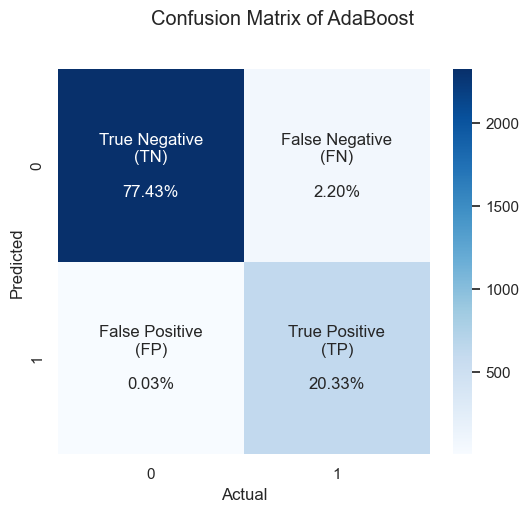

In [57]:
chart = 'AdaBoost'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: Retain<br>
**Class 1**: Churn

### Cross-validation

In [58]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned ADA classifier
ada_before_tuned_cv_recall_scores = cross_val_score(ADA_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
ada_before_tuned_cv_rocauc_scores = cross_val_score(ADA_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", ada_before_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned AdaBoost after a 10 fold cross validation:
Recall   : 0.9978798103485212
ROC-AUC  : 0.9995602927116943


In [59]:
print(ADA_classifier.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


### Hyperparameter Tuning

In [60]:
param_grid = {
    'n_estimators': [100, 300, 500, 600],
    'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0]
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_ada_recall = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_ada_rocauc = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_ada_recall.fit(X_train_resampled, y_train_resampled)
grid_ada_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0],
                         'n_estimators': [100, 300, 500, 600]},
             scoring='roc_auc')

In [61]:
best_hyperparams_recall = grid_ada_recall.best_params_
best_hyperparams_rocauc = grid_ada_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

ada_after_tuned_cv_recall_scores = grid_ada_recall.best_score_
ada_after_tuned_cv_rocauc_scores = grid_ada_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", ada_after_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_after_tuned_cv_rocauc_scores)

best_ada_model = grid_ada_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'learning_rate': 0.01, 'n_estimators': 100}
ROC-AUC  :
 {'learning_rate': 0.01, 'n_estimators': 600}

The cross-validation recall and ROC-AUC score for tuned AdaBoost after a 10 fold cross validation:
Recall : 0.9978798103485212
ROC-AUC  : 0.9998378132683717


In [62]:
best_ada_fit_for_train_data_recall = cross_val_score(best_ada_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_ada_fit_for_train_data_rocauc = cross_val_score(best_ada_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_ada_fit_for_train_data_recall)
print("ROC-AUC  :", best_ada_fit_for_train_data_rocauc)

best_ada_fit_for_test_data_recall = cross_val_score(best_ada_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_ada_fit_for_test_data_rocauc = cross_val_score(best_ada_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_ada_fit_for_test_data_recall)
print("ROC-AUC  :", best_ada_fit_for_test_data_rocauc)

Train Data
Recall   : 0.9978798103485212
ROC-AUC  : 0.998574246989528
Test Data
Recall   : 0.9983333333333333
ROC-AUC  : 0.9978272375051827


## Evaluation

### Model Selection

In [63]:
dict_result = {'Model' :['Naive Bayes', 'Decision Tree', 'AdaBoost'],
                "Recall (train)": [best_nb_fit_for_train_data_recall, best_dt_fit_for_train_data_recall, best_ada_fit_for_train_data_recall],
                "Recall (test)": [best_nb_fit_for_test_data_recall, best_dt_fit_for_test_data_recall, best_ada_fit_for_test_data_recall],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_dt_fit_for_train_data_rocauc, best_ada_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_dt_fit_for_test_data_rocauc, best_ada_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['Recall (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Recall (train),Recall (test),ROC-AUC (train),ROC-AUC (test)
0,AdaBoost,0.997880,0.998333,0.998574,0.997827
1,Decision Tree,0.997880,0.997667,0.998529,0.998260
2,Naive Bayes,0.758047,0.795000,0.852979,0.779187


In churn analysis, the main goal is to identify customers who are likely to churn so that appropriate actions can be taken to retain them. The best model is the one that can generate the most correct predictions. However, in this business context, the percentage of False Negative (FN) is important. A False Negative predicts a customer will not churn when they actually do. False negatives are critical because they represent a missed opportunity to intervene and retain customers who are at risk of churning. Based on that, the percentage of False Negative should be minimized. In this regard, the most suitable evaluation metric is recall because it takes into account False Negative.

Prioritizing recall ensures that the model can avoid mistakenly predicting no churn that is actually churn, thereby increasing the chances of taking proactive action to retain those customers and having a good business impact. In addition, the ROC-AUC score provides a comprehensive measure of the model's performance across various classification thresholds and demonstrates the model's ability to correctly rank classes. This approach allows for a more balanced evaluation and selection of models based on their ability to accurately predict the target variable.

The best model is selected from the model that produces the highest average recall value for the test data and does not indicate overfitting and underfitting. Based on the table above, the selected model is **AdaBoost** with an average recall for the testing data of **0.998333**.

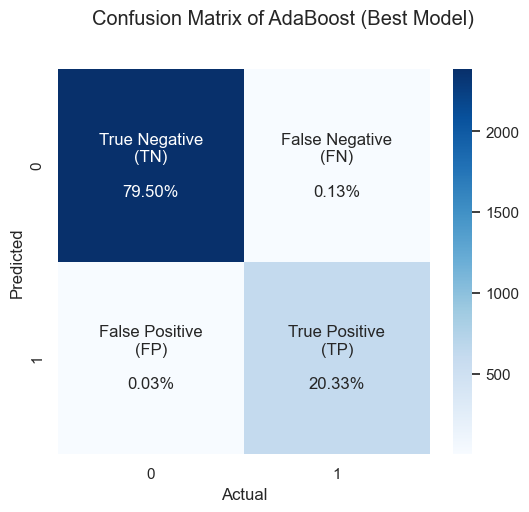

In [64]:
chart = 'AdaBoost (Best Model)'

cm = confusion_matrix(y_test, best_ada_model.predict(X_test))

plot_cm(cm, chart)

**Class 0**: Retain<br>
**Class 1**: Churn

The heatmap above shows the confusion matrix of the best model after the tuning process. Resulting in True Negative (TN) 79.50%, True Positive (TP) 20.33%, False Negative (FN) 0.13%, False Positive (FP) 0.03% which means the model is good enough in predicting churn.

### ROC-AUC Curve

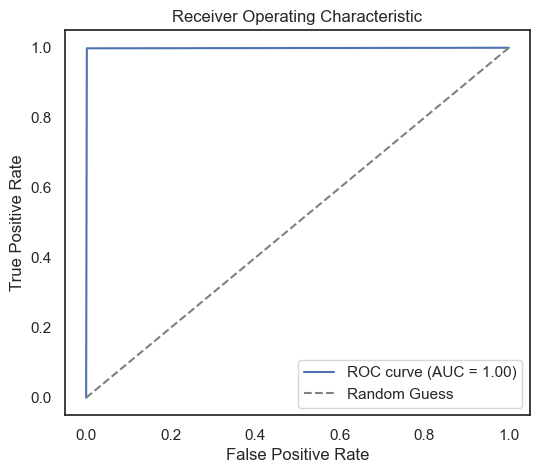

In [65]:
from sklearn.metrics import roc_curve, auc

y_prob = best_ada_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

The graph above shows the ROC-AUC curve with an almost perfect score of 0.997827. This means that the model works well in predicting each class.

# Prediction

In [66]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': best_ada_model.predict(train.drop('Exited', axis=1))})
result = pd.concat([predictions, train], axis=1).rename(columns={'Exited': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Actual', 'Predicted', 'CustomerId', 'Gender', 'Age', 'Geography', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts',
           'HasCrCard', 'Card Type', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
result = result[columns]

# map the numerical labels to their corresponding Churn status
result['Exited (Actual)'] = result['Actual'].map({1: 'Churn', 0: 'Retain'})
result['Exited (Predicted)'] = result['Predicted'].map({1: 'Churn', 0: 'Retain'})

result.head()

,Actual,Predicted,CustomerId,Gender,Age,Geography,Tenure,CreditScore,Balance,NumOfProducts,HasCrCard,Card Type,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited (Actual),Exited (Predicted)
0,1,1,15634602,0,42,0,2,619,0.00,1,1,0,1,101348.88,1,2,464,Churn,Churn
1,0,1,15647311,0,41,2,1,608,83807.86,1,0,0,1,112542.58,1,3,456,Retain,Churn
2,1,1,15619304,0,42,0,8,502,159660.80,3,1,0,0,113931.57,1,3,377,Churn,Churn
3,0,0,15701354,0,39,0,1,699,0.00,2,0,1,0,93826.63,0,5,350,Retain,Retain
4,0,0,15737888,0,43,2,2,850,125510.82,1,1,1,1,79084.10,0,5,425,Retain,Retain


In [67]:
# export data to csv file
result.to_csv('result.csv', index=False)

# Result

Based on the whole process from data preparation, analysis of data exploration results, and modeling, the following are the results:

**Model**
- The most suitable model evaluation metrics in this case are recall and ROC-AUC, using recall because it needs to take into account the percentage of False Negative (FN) that must be minimized. While ROC-AUC is to measure how well (balanced) the model predicts each class.
- The best model obtained is AdaBoost which produces recall and ROC-AUC scores of 0.998333 and 0.997827 in test data, respectively.

**Business Insights**
- Female bank customers churn the most with a percentage of 11.4% compared to males who have a percentage of 9%.
- Bank customers in the 40-50 age group have a higher churn percentage than other age groups at 7.9%. This is followed by the 30-40 age group with a churn percentage of 5.4%, the 50-60 age group with a percentage of 4.5%, the less than 30 age group with a percentage of 1.5%, and the more than 60 age group with a percentage of 1.1%.
- France and Germany have a churn percentage of 8.1% each and Spain with a churn percentage of 4.1%.
- Bank customers who are not active members have a higher churn percentage than active customers, with a churn percentage of 13%.
- Bank customers who have a credit card churn the most with a percentage of 14.2% compared to customers who do not have a credit card with a churn percentage of 6.1%.
- Bank customers with Diamond card type churn more with a percentage of 5.5% than others.
- Bank customers who purchased at least 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.
- Each satisfaction score has a relatively balanced percentage with the percentage numbers ranging from 19-20%.
- All bank customers who churn are customers who also make complaints against the bank.
- The age distribution of churned and retained bank customers is relatively similar, spread between the ages of 30 years to 50 years. The age distribution of retained bank customers is mostly between the ages of 30 years and 40 years.
- The credit score distribution of churn and retain customers is similar, spread between 600 and 700.
- The balance distribution of churn customers is spread between 40,000 and 125,000. While the balance distribution of retain customers is spread between 0 and 125,000.